## Crypto Arbitrage



The notebok will sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. The task is determine if any arbitrage opportunities exist for Bitcoin.




###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module.
# The CSV file is located in the Resources folder.
csvfile = Path("Resources/bitstamp.csv")

# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    csvfile,
    parse_dates=True,
    infer_datetime_format=True
).set_index("Timestamp")

# Set "Timestamp" to a datetime object
bitstamp.index = pd.to_datetime(bitstamp.index)

In [3]:
# Confirm
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# Set the parse_dates and infer_datetime_format parameters
csvfile = Path("Resources/coinbase.csv")
coinbase = pd.read_csv(
    csvfile,
    parse_dates=True,
    infer_datetime_format=True
).set_index("Timestamp")

# Set "Timestamp" to a datetime object
coinbase.index = pd.to_datetime(coinbase.index)

In [5]:
# Confirm
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()

In [7]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "") 

<ipython-input-7-30a537c7a2dd>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")


In [8]:
# Convert the Close data type to a float
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")

In [9]:
# Review the data for duplicate values
bitstamp.duplicated().sum()

0

In [10]:
# For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame
coinbase = coinbase.dropna()

# Use the str.replace function to remove the dollar sign, $
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "") 

# Convert the Close data type to a float
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")

<ipython-input-10-80e05a4ed0db>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")


## Analyze the Data

In [11]:
# Select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.iloc[:, [3]]

# Review
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [12]:
# Select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.iloc[:, [3]]

# Review
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


In [13]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp[["Close"]].describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [14]:
# Generate the summary statistics for the coinbase DataFrame
coinbase[["Close"]].describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp Closing BTC Prices \nJanuary-March 2018'}, xlabel='Timestamp'>

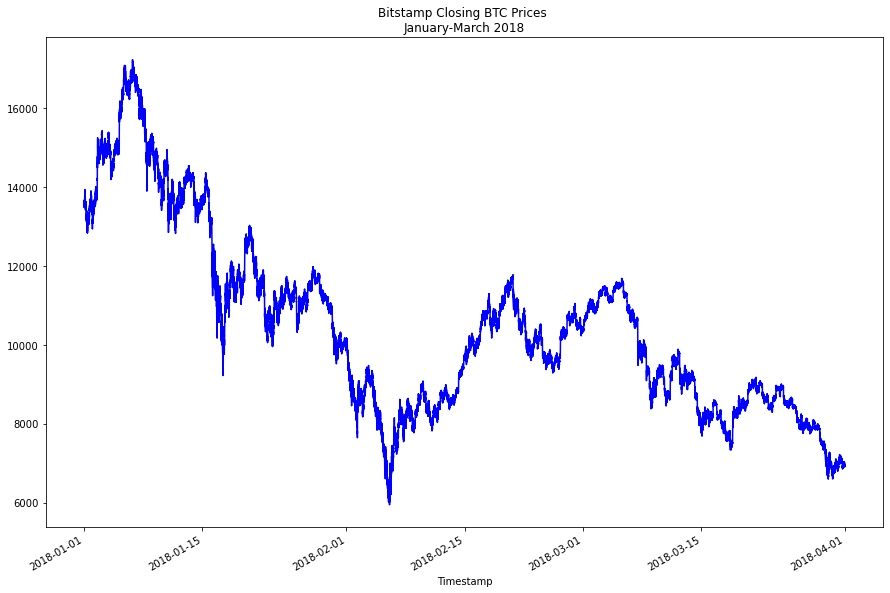

In [15]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
bitstamp["Close"].plot( 
    figsize = (15,10),
    title="Bitstamp Closing BTC Prices \nJanuary-March 2018",
    color="b"
)

<AxesSubplot:title={'center':'Coinbase Closing BTC Prices \nJanuary-March 2018'}, xlabel='Timestamp'>

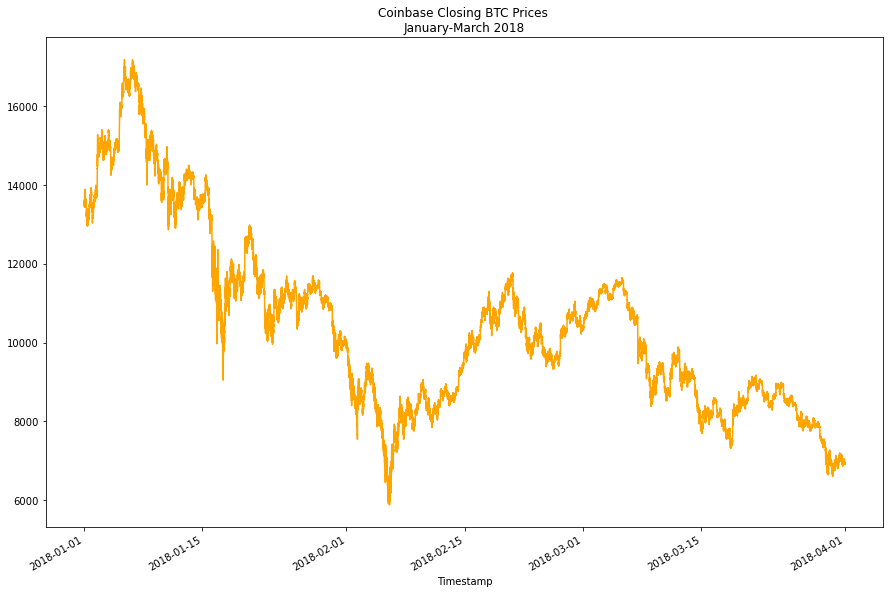

In [16]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
coinbase['Close'].plot(
    figsize=(15,10),
    title="Coinbase Closing BTC Prices \nJanuary-March 2018",
    color="orange"
)

<AxesSubplot:title={'center':'Bitstamp BTC Closing & Coinbase BTC Closing \nJanuary-March 2018'}, xlabel='Timestamp'>

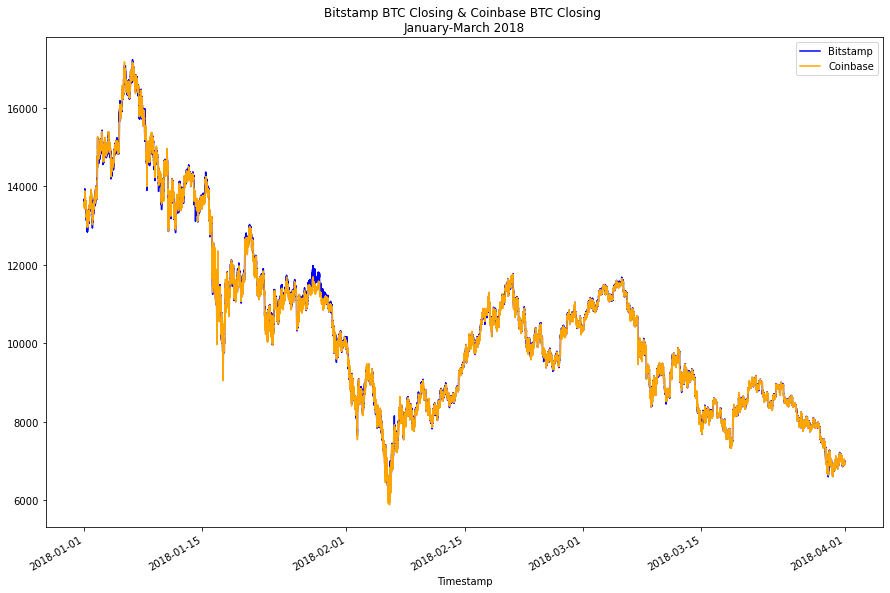

In [17]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
bitstamp['Close'].plot(
    legend = True, 
    figsize=(15,10), 
    title='Bitstamp BTC Closing & Coinbase BTC Closing \nJanuary-March 2018', 
    color='b', 
    label='Bitstamp'
)
coinbase['Close'].plot(
    legend = True, 
    figsize = (15,10), 
    color='orange', 
    label= 'Coinbase'
)

<AxesSubplot:title={'center':'Bitstamp BTC Closing & Coinbase BTC Closing \nJanuary 2018'}, xlabel='Timestamp'>

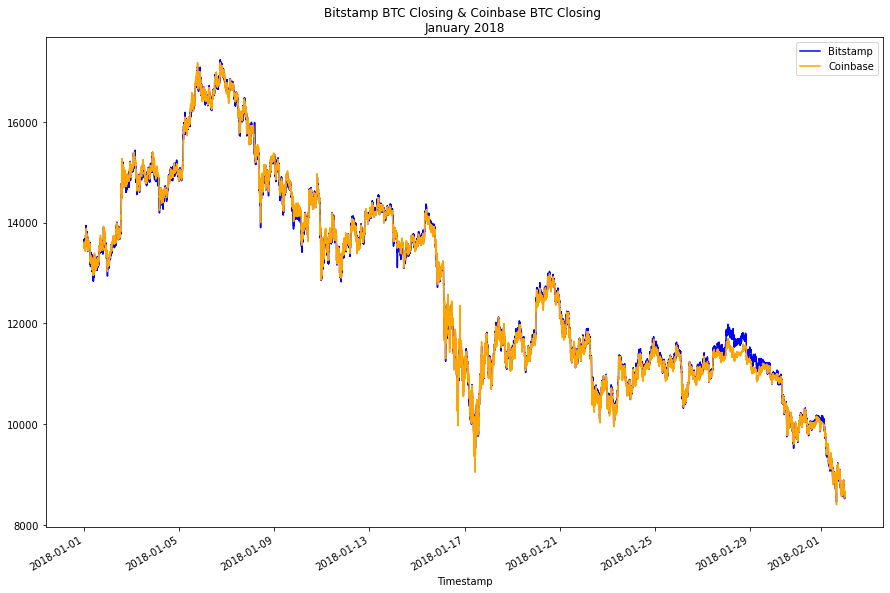

In [18]:
# Create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
bitstamp["Close"].loc["2018-01-01" : "2018-02-01"].plot(
    legend = True, 
    figsize=(15,10), 
    title='Bitstamp BTC Closing & Coinbase BTC Closing \nJanuary 2018', 
    color='b', 
    label='Bitstamp'
)
coinbase['Close'].loc["2018-01-01" : "2018-02-01"].plot(
    legend = True, 
    figsize = (15,10), 
    color='orange', 
    label= 'Coinbase'
)

<AxesSubplot:title={'center':'Bitstamp BTC Closing & Coinbase BTC Closing \nMarch 2018'}, xlabel='Timestamp'>

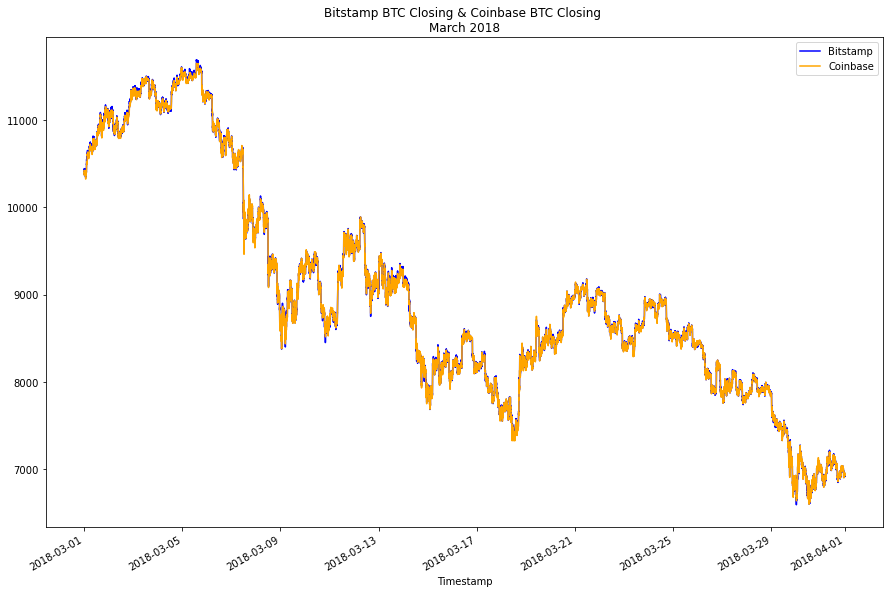

In [19]:
# Create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
bitstamp["Close"].loc["2018-03-01" : "2018-04-01"].plot(
    legend = True, 
    figsize=(15,10), 
    title='Bitstamp BTC Closing & Coinbase BTC Closing \nMarch 2018', 
    color='b', 
    label='Bitstamp'
)
coinbase['Close'].loc["2018-03-01" : "2018-04-01"].plot(
    legend = True, 
    figsize = (15,10), 
    color='orange', 
    label= 'Coinbase'
)

<AxesSubplot:title={'center':'Bitstamp BTC Closing & Coinbase BTC Closing \nJanuary 20, 2018'}, xlabel='Timestamp'>

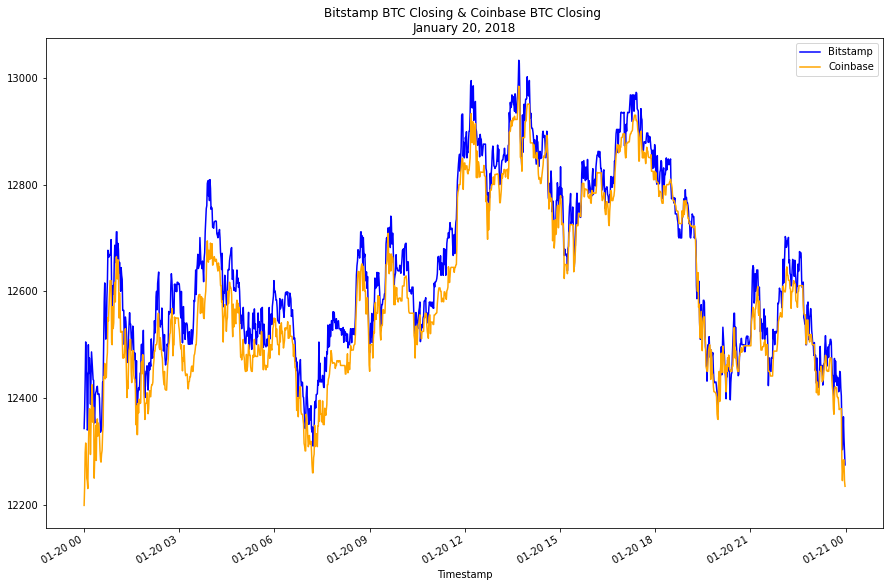

In [20]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
bitstamp["Close"].loc["2018-01-20"].plot(
    legend = True, 
    figsize=(15,10), 
    title='Bitstamp BTC Closing & Coinbase BTC Closing \nJanuary 20, 2018', 
    color='b', 
    label='Bitstamp'
)
coinbase['Close'].loc["2018-01-20"].plot(
    legend = True, 
    figsize = (15,10), 
    color='orange', 
    label= 'Coinbase'
)

In [21]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early =  coinbase['Close'].loc["2018-01-20"] - bitstamp["Close"].loc["2018-01-20"]

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1437.000000
mean      -42.888163
std        29.990035
min      -200.500000
25%       -60.020000
50%       -41.460000
75%       -24.280000
max        56.350000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - January 20, 2018'}>

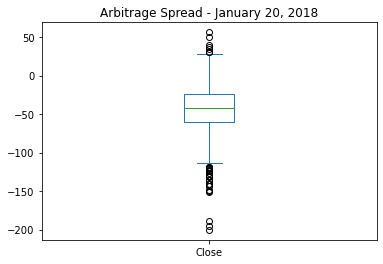

In [22]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind="box", title="Arbitrage Spread - January 20, 2018")

<AxesSubplot:title={'center':'Bitstamp BTC Closing & Coinbase BTC Closing \nFebruary 20, 2018'}, xlabel='Timestamp'>

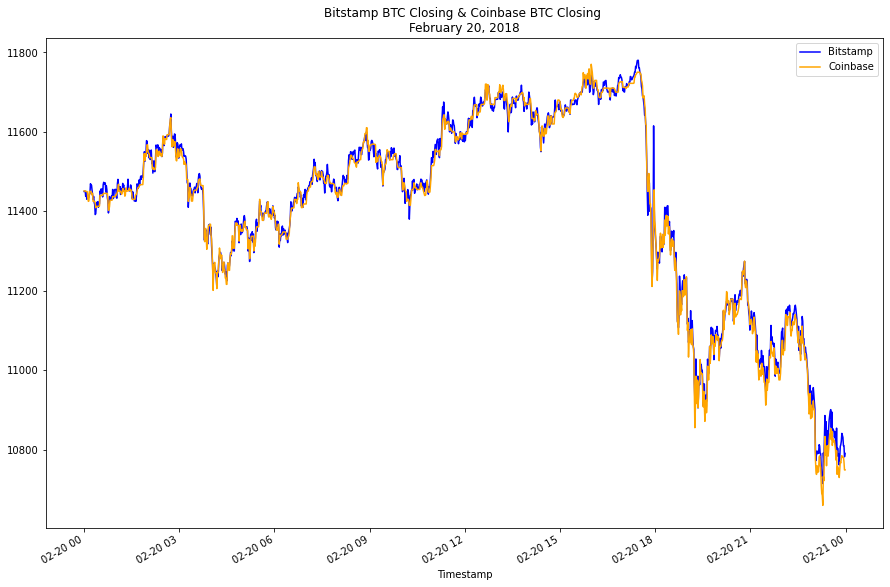

In [23]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
bitstamp["Close"].loc["2018-02-20"].plot(
    legend = True, 
    figsize=(15,10), 
    title='Bitstamp BTC Closing & Coinbase BTC Closing \nFebruary 20, 2018', 
    color='b', 
    label='Bitstamp'
)
coinbase["Close"].loc["2018-02-20"].plot(
    legend = True, 
    figsize = (15,10), 
    color='orange', 
    label= 'Coinbase'
)

In [24]:
# Using the date in the middle, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase["Close"].loc["2018-02-20"] - bitstamp["Close"].loc["2018-02-20"] 

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1439.000000
mean       -7.038860
std        17.337259
min      -254.000000
25%       -16.825000
50%        -5.910000
75%         3.960000
max        59.940000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - February 20, 2018'}>

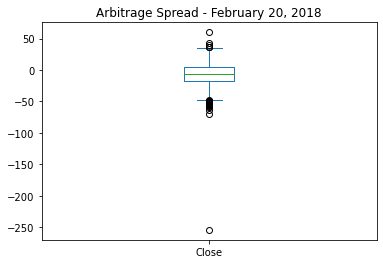

In [25]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind="box", title="Arbitrage Spread - February 20, 2018")

<AxesSubplot:title={'center':'Bitstamp BTC Closing & Coinbase BTC Closing \nMarch 20, 2018'}, xlabel='Timestamp'>

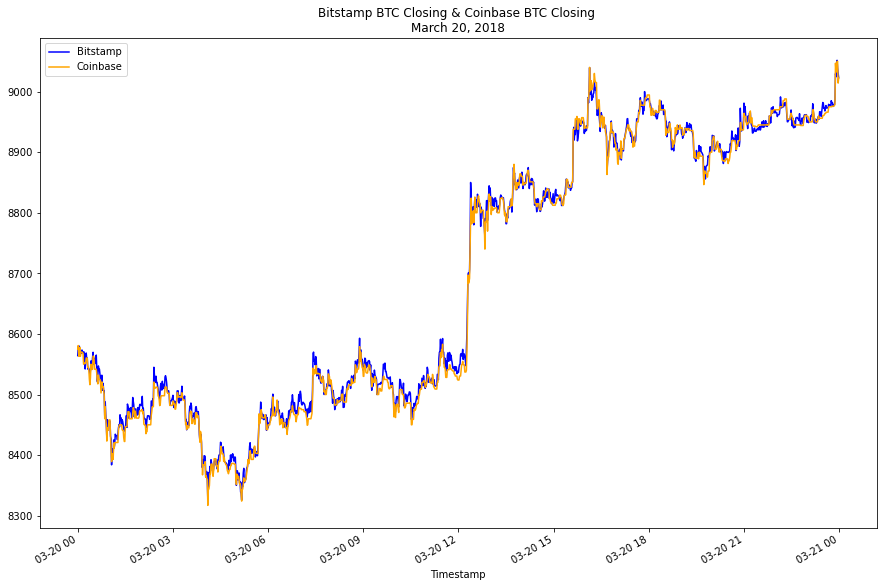

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
bitstamp["Close"].loc["2018-03-20"].plot(
    legend = True, 
    figsize=(15,10), 
    title='Bitstamp BTC Closing & Coinbase BTC Closing \nMarch 20, 2018', 
    color='b', 
    label='Bitstamp'
)
coinbase["Close"].loc["2018-03-20"].plot(
    legend = True, 
    figsize = (15,10), 
    color='orange', 
    label= 'Coinbase'
)

In [27]:
# Using the date from the late, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp["Close"].loc["2018-03-20"] - coinbase["Close"].loc["2018-03-20"]

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1432.000000
mean        4.572556
std         9.269393
min       -27.930000
25%        -1.477500
50%         4.825000
75%        10.962500
max        59.950000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - March 20, 2018'}>

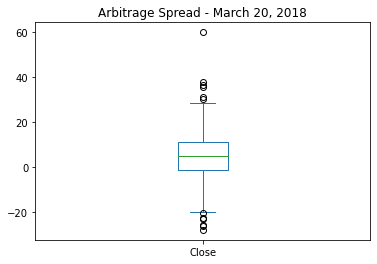

In [28]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind="box", title="Arbitrage Spread - March 20, 2018")

In [29]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase['Close'].loc["2018-01-16"] - bitstamp["Close"].loc["2018-01-16"]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early[arbitrage_spread_early > 0].describe()

count    960.000000
mean      53.405344
std       53.910409
min        0.010000
25%       21.602500
50%       39.885000
75%       68.547500
max      606.800000
Name: Close, dtype: float64

In [30]:
# For the date middle in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = coinbase['Close'].loc["2018-02-20"] - bitstamp["Close"].loc["2018-02-20"]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_middle[arbitrage_spread_middle > 0].describe()

count    498.000000
mean       9.553815
std        8.046044
min        0.010000
25%        3.512500
50%        7.705000
75%       13.860000
max       59.940000
Name: Close, dtype: float64

In [31]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = coinbase['Close'].loc["2018-03-20"] - bitstamp["Close"].loc["2018-03-20"]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_late[arbitrage_spread_late > 0].describe()

count    448.000000
mean       5.706830
std        4.944639
min        0.010000
25%        1.817500
50%        4.275000
75%        8.525000
max       27.930000
Name: Close, dtype: float64

In [32]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0]/bitstamp["Close"].loc["2018-01-16"]

# Review the spread return DataFrame
spread_return_early.head()

Timestamp
2018-01-16 00:00:00         NaN
2018-01-16 00:01:00         NaN
2018-01-16 00:02:00    0.000731
2018-01-16 00:03:00    0.001108
2018-01-16 00:04:00    0.000909
Name: Close, dtype: float64

In [33]:
# For the date middle in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0]/bitstamp["Close"].loc["2018-02-20"]

# Review the spread
spread_return_middle.head()

Timestamp
2018-02-20 00:00:00    0.000118
2018-02-20 00:01:00    0.000094
2018-02-20 00:02:00    0.000048
2018-02-20 00:03:00    0.001068
2018-02-20 00:04:00    0.000046
Name: Close, dtype: float64

In [34]:
# For the date late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late = arbitrage_spread_late[arbitrage_spread_late > 0]/bitstamp["Close"].loc["2018-03-16"]

# Review the spread
spread_return_late.head()

Timestamp
2018-03-16 00:00:00   NaN
2018-03-16 00:01:00   NaN
2018-03-16 00:02:00   NaN
2018-03-16 00:03:00   NaN
2018-03-16 00:04:00   NaN
Name: Close, dtype: float64

In [35]:
# For the date early in the dataset, determine the number of times trades with positive returns 
# exceed the 1% minimum threshold (.01) that need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > 0.01]

# Review the spread
profitable_trades_early.head()

Timestamp
2018-01-16 02:56:00    0.012962
2018-01-16 02:57:00    0.010838
2018-01-16 02:59:00    0.014171
2018-01-16 03:00:00    0.010675
2018-01-16 03:06:00    0.019704
Name: Close, dtype: float64

In [36]:
# For the date middle in the dataset, determine the number of times trades with positive returns 
# exceed the 1% minimum threshold (.01) that need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]

# Review profitable trades
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [37]:
# For the date late in the dataset, determine the number of times trades with positive returns 
# exceed the 1% minimum threshold (.01) that need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > 0.01]

# Review profitable trades
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

*NOTE*: The cause for having empty datasets is because of these days having no profitable of noticable differences between Bitstamp's and Coinbase's closing prices.

In [38]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    73.000000
mean      0.016720
std       0.007628
min       0.010109
25%       0.012061
50%       0.014794
75%       0.018124
max       0.051633
Name: Close, dtype: float64

In [39]:
# For the date middle in the dataset, generate the summary statistics for the profitable trades
# or trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [40]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

*NOTE*: The datasets are empty which causes the statistics to return NaN (Not a Number)

In [41]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp["Close"].loc["2018-01-16"]

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit
profit_per_trade_early.head()

Timestamp
2018-01-16 02:56:00    162.01
2018-01-16 02:57:00    135.00
2018-01-16 02:59:00    176.13
2018-01-16 03:00:00    134.01
2018-01-16 03:06:00    241.54
Name: Close, dtype: float64

In [42]:
# For the date middle in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * bitstamp["Close"].loc["2018-02-20"]

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the middle profit
profit_per_trade_middle.head()

Series([], Name: Close, dtype: float64)

In [43]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * bitstamp["Close"].loc["2018-02-20"]

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the late profit
profit_per_trade_late.head()

Series([], Name: Close, dtype: float64)

In [44]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count     73.000000
mean     193.796849
std       88.701429
min      112.520000
25%      139.420000
50%      171.310000
75%      210.060000
max      606.800000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - January 16, 2018'}, xlabel='Timestamp'>

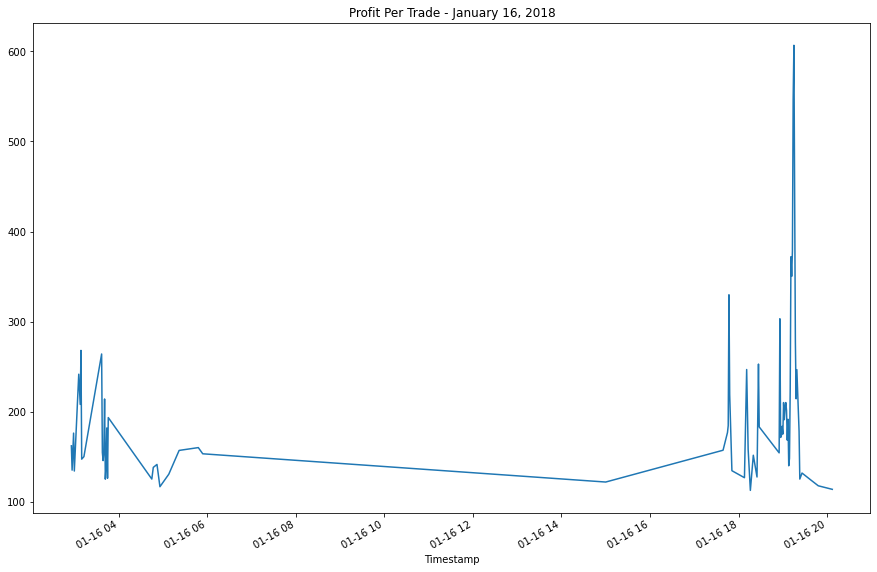

In [45]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(15,10), title="Profit Per Trade - January 16, 2018")

In [46]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - February 20, 2018'}, xlabel='Timestamp'>

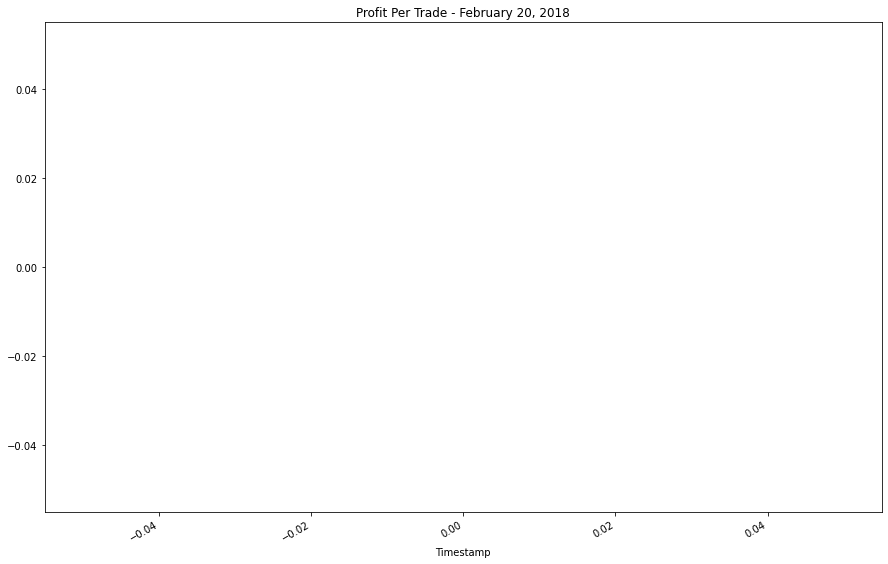

In [47]:
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot(figsize=(15,10), title="Profit Per Trade - February 20, 2018")

*NOTE*: We get the same result for when we describe and plot ```profit_per_trade_late```

In [48]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_sum_early = profit_per_trade_early.sum()
profit_sum_early

14147.169999999998

In [49]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_sum_middle = profit_per_trade_middle.sum()
profit_sum_middle

0.0

In [50]:
# Calculate the sum of the potential profits for the late middle per trade DataFrame
profit_sum_middle = profit_per_trade_middle.sum()
profit_sum_middle

0.0

In [51]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Sum - January 16, 2018'}, xlabel='Timestamp'>

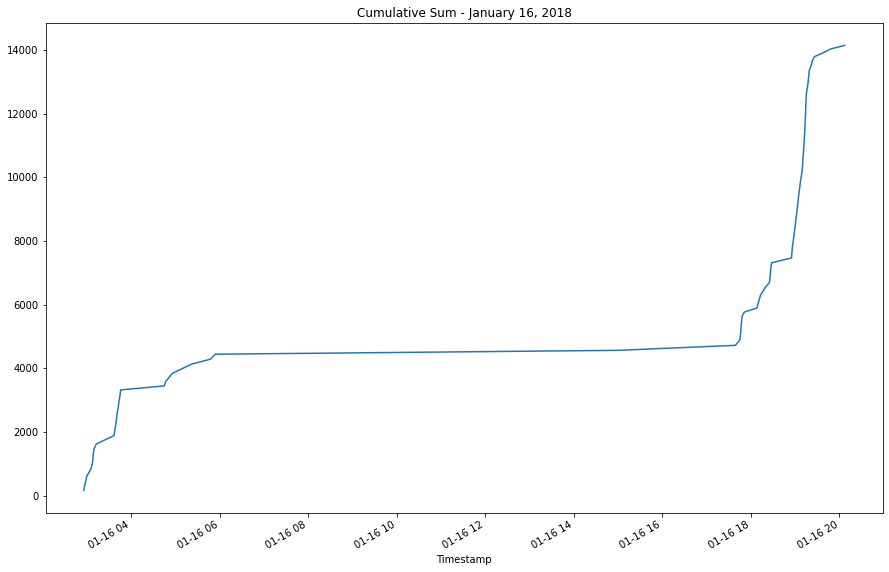

In [52]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(15,10), title="Cumulative Sum - January 16, 2018")

In [53]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:title={'center':'Cumulative Sum - February 20, 2018'}, xlabel='Timestamp'>

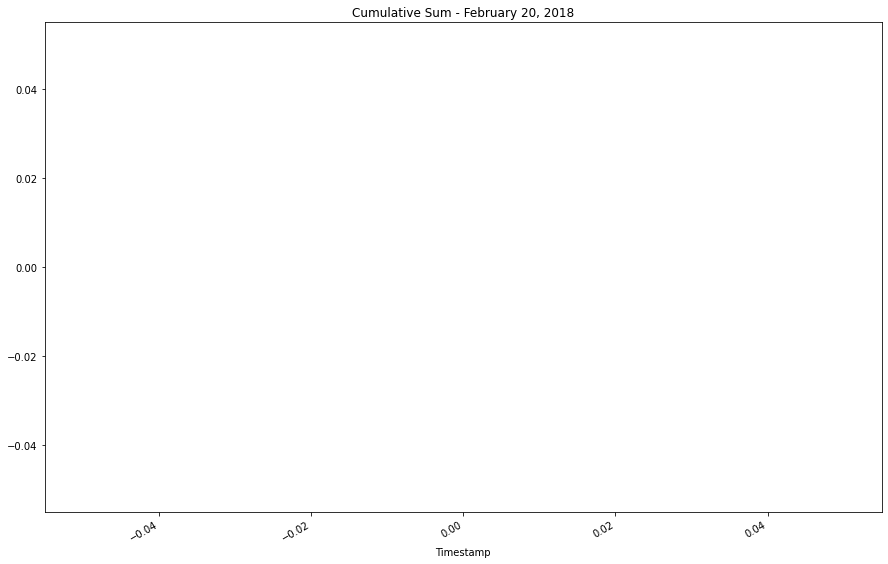

In [54]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame
cumulative_profit_middle.plot(figsize=(15,10), title="Cumulative Sum - February 20, 2018")

*NOTE*: We get the same result for when we describe and plot ```profit_per_trade_late```